# Grid Sizes: 0.07962000000000558

In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv('../../data/Biomass_History.csv')
df

,Index,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017
0,0,24.66818,71.33144,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925,5.180296
1,1,24.66818,71.41106,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847,42.126945
2,2,24.66818,71.49069,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629,73.203232
3,3,24.66818,71.57031,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720,101.067352
4,4,24.66818,71.64994,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315,26.086885
...,...,...,...,...,...,...,...,...,...,...,...
2413,2413,20.15456,72.84432,5.199882,4.516778,4.321080,2.658953,5.113997,5.301668,6.419223,5.321604
2414,2414,20.15456,72.92394,0.122287,0.126717,0.101494,0.111509,0.121749,0.122467,0.145785,0.120626
2415,2415,20.15456,73.00357,0.039415,0.040843,0.032713,0.035941,0.039241,0.039473,0.046989,0.038879
2416,2416,20.15456,73.08319,2.719220,1.370163,0.818687,1.205721,1.316443,1.324201,1.576338,1.304297


In [8]:
df['Latitude'].describe()
print(df['Latitude'].value_counts().sort_index())

Latitude
20.15456     7
20.23516    11
20.31576    11
20.39636     8
20.47696     9
20.55756     9
20.63816    11
20.71876    22
20.79936    27
20.87996    29
20.96056    38
21.04116    38
21.12176    42
21.20236    46
21.28296    48
21.36356    50
21.44416    57
21.52477    57
21.60537    58
21.68597    55
21.76657    55
21.84717    55
21.92777    55
22.00837    60
22.08897    61
22.16957    61
22.25017    65
22.33077    66
22.41137    60
22.49197    54
22.57257    53
22.65317    54
22.73377    55
22.81437    62
22.89497    65
22.97557    64
23.05617    66
23.13677    70
23.21737    68
23.29797    62
23.37858    61
23.45918    58
23.53978    51
23.62038    44
23.70098    43
23.78158    41
23.86218    41
23.94278    39
24.02338    28
24.10398    26
24.18458    25
24.26518    26
24.34578    23
24.42638    21
24.50698    18
24.58758    15
24.66818    14
Name: count, dtype: int64


In [12]:
sample_0 = df.iloc[0, 1:3]
sample_1 = df.iloc[1, 1:3]
np.sqrt((sample_0.Latitude - sample_1.Latitude) ** 2 + (sample_0.Longitude - sample_1.Latitude) ** 2)

46.66326

In [45]:
arr_lat = df['Latitude'].values
arr_lon = df['Longitude'].values

arr_lat = arr_lat.reshape(-1, 1)
arr_lon = arr_lon.reshape(-1, 1)

arr_lat = np.repeat(arr_lat, len(arr_lat), axis=1)
arr_lon = np.repeat(arr_lon, len(arr_lon), axis=1)

arr_lat = arr_lat - arr_lat.T
arr_lon = arr_lon - arr_lon.T

arr_lat = arr_lat ** 2
arr_lon = arr_lon ** 2


arr_lat = np.sqrt(arr_lat + arr_lon)

min_distances = np.where(arr_lat == 0, 10000, arr_lat).min(axis=1)
df_distances = pd.DataFrame(min_distances, columns=['Distance'])
df_distances.value_counts()


Distance
0.07962     2250
0.07963      168
Name: count, dtype: int64

<Axes: title={'center': '2 types of distances'}, xlabel='Longitude', ylabel='Latitude'>

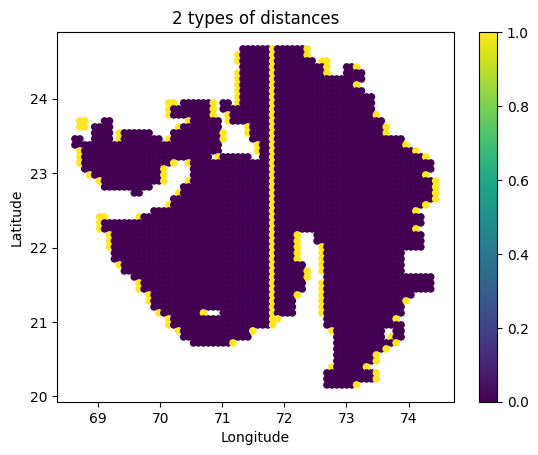

In [46]:
df_plot = df.copy()
df_plot['Distance'] = df_distances
df_plot['Distance_bool'] = df_distances > 0.079621

df_plot.plot.scatter(x='Longitude', y='Latitude', c=df_plot['Distance_bool'], colormap='viridis',
                     title='2 types of distances')